In [1404]:
import activation_func as fn
from model import Model
from layer import Layer
from loss_func import MSE
from data_loader import DataLoader

In [1405]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [1406]:
def draw_from_pixels(img):
    first_image_pixels = img
    image_shape = (28, 28)  

    image_array = np.array(first_image_pixels).reshape(image_shape)

    plt.imshow(image_array, cmap='gray')
    plt.show()

In [1407]:
discriminator = Model()

discriminator = discriminator.load('models/discriminator1.pickle')

In [1408]:
generator = Model(learning_rate=10e-7)

generator.add_layer(Layer(in_features=100, out_features=7*7, activation_function=fn.LeakyReLU(0.2)))
generator.add_layer(Layer(in_features=7*7, out_features=14*14, activation_function=fn.LeakyReLU(0.2)))
generator.add_layer(Layer(in_features=14*14, out_features=28*28, activation_function=fn.LeakyReLU(0.2)))

In [1409]:
class GenTrainer:
    def __init__(self, generator, discriminator):
        self.generator = generator
        self.discriminator = discriminator

        self.generator.train()
        self.discriminator.eval()

    def train(self, input, y):
        output = generator.forward(input)
        
        evaluation = discriminator.forward(output)

        error = discriminator.backward(y)
        generator.backward_from(error)

        return output, evaluation


In [1410]:
prompt = 1

In [1411]:
trainer = GenTrainer(generator, discriminator)

In [1412]:
one_hot_prompt = np.zeros(10)
one_hot_prompt[prompt] = 1

In [1413]:
num_epochs = 200

0: 0.15378971432421984


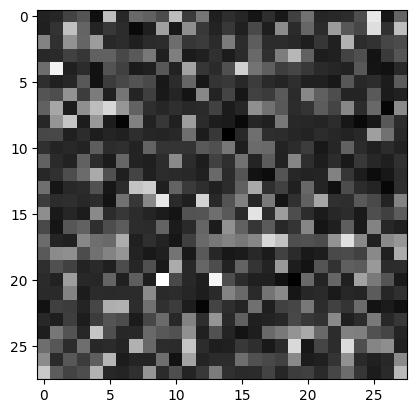

4: 0.12697410178211516


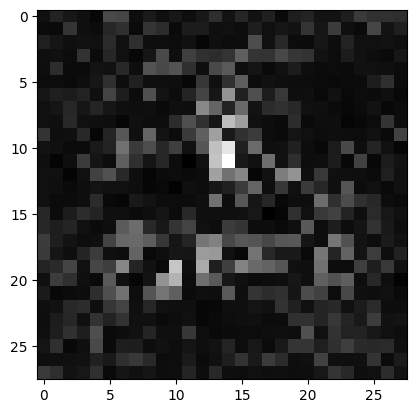

16: 1.0499923283149539e-10


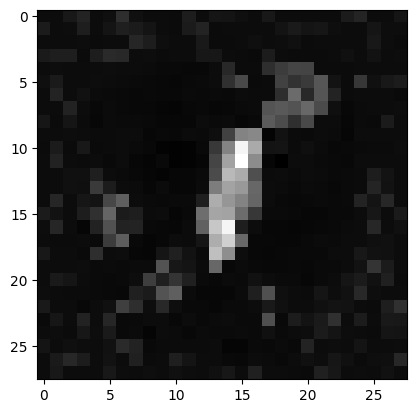

64: 5.017581865446742e-11


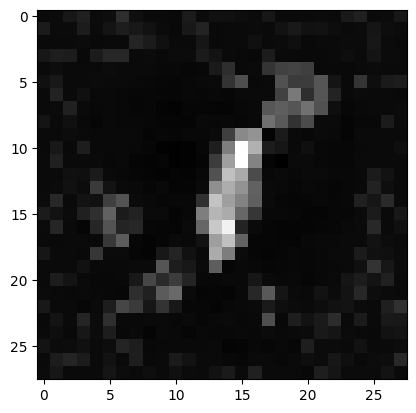

In [1414]:
results = []
iter = 0
for epoch in range(num_epochs):
    z = np.random.uniform(0, 255, 100)

    output, evaluation = trainer.train(z, one_hot_prompt)
    results.append(evaluation)

    if epoch % 4**iter == 0:
        print(f"{epoch}: {MSE(evaluation, one_hot_prompt)}")
        draw_from_pixels(output)
        iter+=1



In [1415]:
z = np.random.uniform(0, 255, 100)
y = generator.predict(np.array([z]))

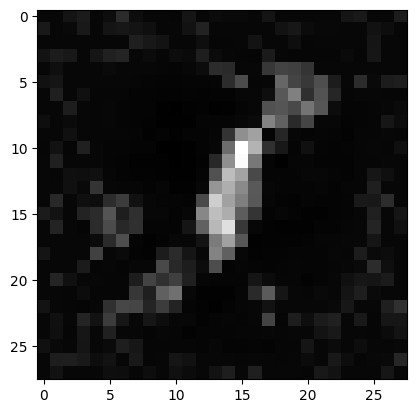

In [1416]:
draw_from_pixels(y)